In [206]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') # Look Pretty

In [207]:
def drawLine(model, X_test, y_test, title):
  # This convenience method will take care of plotting your
  # test observations, comparing them to the regression line,
  # and displaying the R2 coefficient
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(X_test, y_test, c='g', marker='o')
  ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

  print("Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
  print("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
  print("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])

  score = model.score(X_test, y_test)
  title += " R2: " + str(score)
  ax.set_title(title)

  plt.show()

In [208]:
# TODO: Load up the data here into a variable called 'X'.
# As usual, do a .describe and a print of your dataset and
# compare it to the dataset loaded in a text file or in a
# spread sheet application
df = pd.read_csv('C:/Users/t.bugaevskiy/Desktop/edX/08_DAT_210x_Programming_with_Python_for_Data_Science/Module5/Datasets/life_expectancy.csv',
                sep = '\t')
df

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
0,1900,46.6,48.7,32.5,33.5
1,1950,66.5,72.2,59.1,62.9
2,1960,67.4,74.1,61.1,66.3
3,1970,68.0,75.6,60.0,68.3
4,1975,69.5,77.3,62.4,71.3
5,1980,70.7,78.1,63.8,72.5
6,1981,71.1,78.4,64.5,73.2
7,1982,71.5,78.7,65.1,73.6
8,1983,71.6,78.7,65.2,73.5
9,1984,71.8,78.7,65.3,73.6


In [209]:
# TODO: Create your linear regression model here and store it in a
# variable called 'model'. Don't actually train or do anything else
# with it yet:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [210]:
# TODO: Slice out your data manually (e.g. don't use train_test_split,
# but actually do the Indexing yourself. Set X_train to be year values
# LESS than 1986, and y_train to be corresponding WhiteMale age values.
df_train = df.loc[df['Year'] <= 1986]
df_test = df.loc[df['Year'] > 1986]
X_train = pd.DataFrame(df_train['Year'])
X_test = pd.DataFrame(df_test['Year'])
y_train = pd.DataFrame(df_train['WhiteMale'])
y_test = pd.DataFrame(df_test['WhiteMale'])

Est 2014 WhiteMale Life Expectancy:  [ 80.66073151]
Est 2030 WhiteMale Life Expectancy:  [ 85.15783762]
Est 2045 WhiteMale Life Expectancy:  [ 89.3738746]


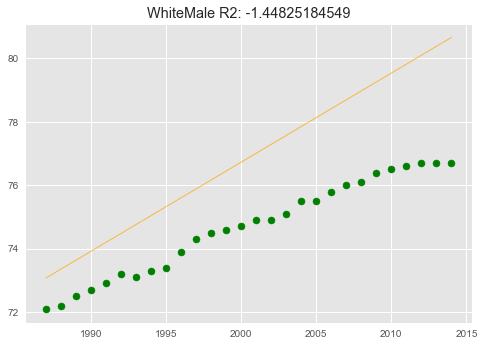

In [211]:
# TODO: Train your model then pass it into drawLine with your training
# set and labels. You can title it "WhiteMale". drawLine will output
# to the console a 2014 extrapolation / approximation for what it
# believes the WhiteMale's life expectancy in the U.S. will be...
# given the pre-1986 data you trained it with. It'll also produce a
# 2030 and 2045 extrapolation.
model0 = model.fit(X_train, y_train)
drawLine(model0, X_test, y_test, 'WhiteMale')

In [212]:
# TODO: Print the actual 2014 WhiteMale life expectancy from your
# loaded dataset
y_test.loc[X_test['Year'] == 2014]

,WhiteMale
39,76.7


Est 2014 BlackFemale Life Expectancy:  [ 88.25201467]
Est 2030 BlackFemale Life Expectancy:  [ 95.57605004]
Est 2045 BlackFemale Life Expectancy:  [ 102.4423332]


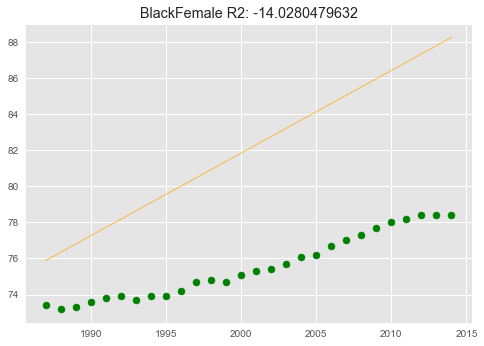

In [213]:
# TODO: Repeat the process, but instead of for WhiteMale, this time
# select BlackFemale. Create a slice for BlackFemales, fit your
# model, and then call drawLine. Lastly, print out the actual 2014
# BlackFemale life expectancy
y_train1 = pd.DataFrame(df_train['BlackFemale'])
y_test1 = pd.DataFrame(df_test['BlackFemale'])
model1 = model.fit(X_train, y_train1)
drawLine(model1, X_test, y_test1, 'BlackFemale')

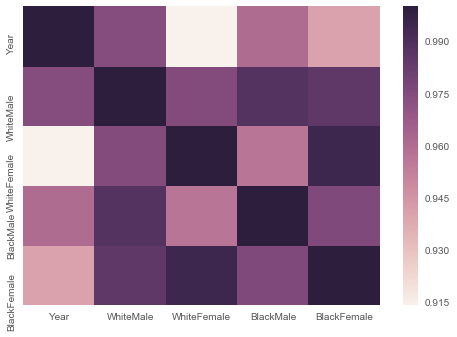

In [214]:
# TODO: Lastly, print out a correlation matrix for your entire
# dataset, and display a visualization of the correlation
# matrix, just as we described in the visualization section of
# the course
df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.show()

In [215]:
df.corr()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
Year,1.000000,0.974154,0.913907,0.960635,0.940429
WhiteMale,0.974154,1.000000,0.975164,0.987974,0.985009
WhiteFemale,0.913907,0.975164,1.000000,0.956689,0.994656
BlackMale,0.960635,0.987974,0.956689,1.000000,0.975922
BlackFemale,0.940429,0.985009,0.994656,0.975922,1.000000
